# Description

# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm


# General settings

In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [3]:
device

'cpu'

# Generating datapoints

In [4]:
def generate_regression_point(x, mean=0, std=0.02):
    # Create sample from noise random variable 
    mean = mean
    std = std
    epsilon = np.random.normal(loc=mean, scale=std)
    # Create noisy x
    x_noisy = x + epsilon
    
    # Create output value
    y = x_noisy + 0.3*np.sin(2*math.pi*(x_noisy)) + 0.3*np.sin(4*math.pi*((x_noisy)))
    return y

In [5]:
# Generate dataset
# X = torch.tensor([-4, -3, -2, -1, 1, 2, 3, 4]).reshape(-1,1)
X = torch.linspace(0, 0.5, 100, dtype=torch.float32).reshape(-1,1)
y = generate_regression_point(X)

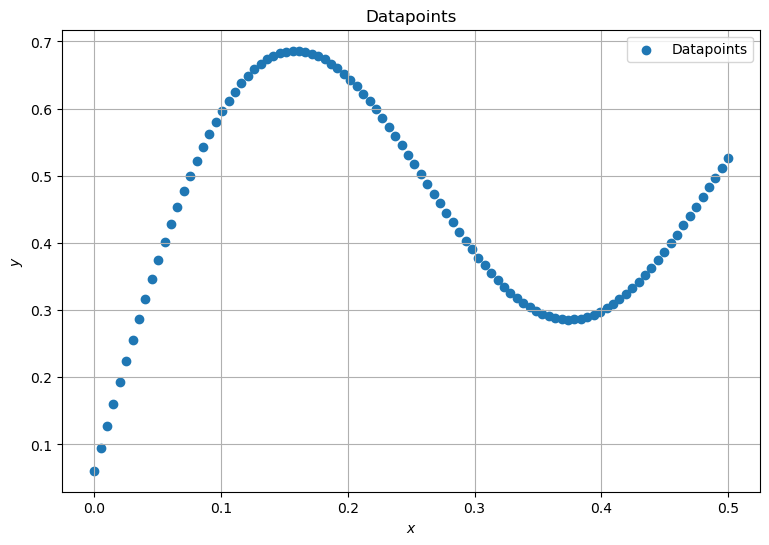

In [6]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y, label="Datapoints")
plt.title("Datapoints")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

# Learning the regression function with a neural network

In [7]:
class neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,16)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(16,32)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(32,16)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(16,1)

    def forward(self, x):
        x = self.act1(self.l1(x))
        x = self.act2(self.l2(x))
        x = self.act3(self.l3(x))
        x = self.l4(x)
        return x

In [8]:
# Initialize neural network
net1 = neural_network().to(device)

# Specify the loss - MSE loss for regression
loss_fn = nn.MSELoss()

# Specify optimizer - Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(net1.parameters(), lr=0.05)

# Train the model
epochs = 50000

for epoch in tqdm(range(epochs)):
    # zero gradients
    optimizer.zero_grad()
    # pass forward 
    y_pred = net1(X.to(device))
    # evaluate performance
    loss = loss_fn(y_pred, y.to(device))
    # calculate the gradients
    loss.backward()
    # update weights
    optimizer.step()
    # print progress
    if epoch % 10000 == 0:
        print("loss: {} | epoch {}".format(loss, epoch))

  0%|          | 62/50000 [00:00<01:27, 569.30it/s]

loss: 0.1830490082502365 | epoch 0


 20%|██        | 10129/50000 [00:14<01:05, 612.06it/s]

loss: 0.000871040509082377 | epoch 10000


 40%|████      | 20026/50000 [00:35<01:33, 321.19it/s]

loss: 5.5239750508917496e-05 | epoch 20000


 60%|██████    | 30064/50000 [00:53<00:41, 483.58it/s]

loss: 3.692098835017532e-05 | epoch 30000


 80%|████████  | 40032/50000 [01:09<00:16, 621.30it/s]

loss: 4.6432760427705944e-05 | epoch 40000


100%|██████████| 50000/50000 [01:23<00:00, 595.34it/s]


In [9]:
X_test = torch.linspace(0, 0.5, 20, dtype=torch.float32).reshape(-1,1)

y_pred = net1(X_test.to(device))
y_true = generate_regression_point(X_test)

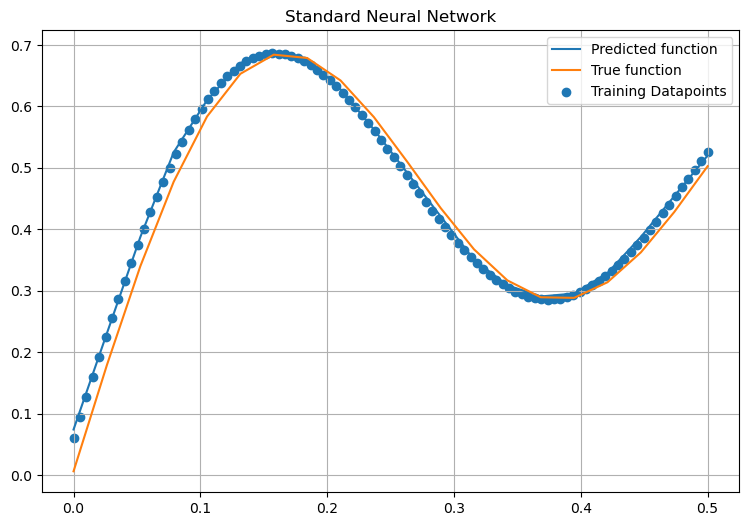

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(X_test.detach().numpy(), y_pred.detach().numpy(), label = "Predicted function")
plt.plot(X_test.detach().numpy(), y_true.detach().numpy(), label = "True function")
plt.scatter(X, y, label = "Training Datapoints")
plt.title("Standard Neural Network")
plt.legend()
plt.grid()
plt.show()

Now, the aim is to verify the extrapolation quality of the model

In [11]:
X_test_large = torch.linspace(-0.2,1.2,100).reshape(-1,1)

y_pred_large = net1(X_test_large.to(device))
y_true_large = generate_regression_point(X_test_large)

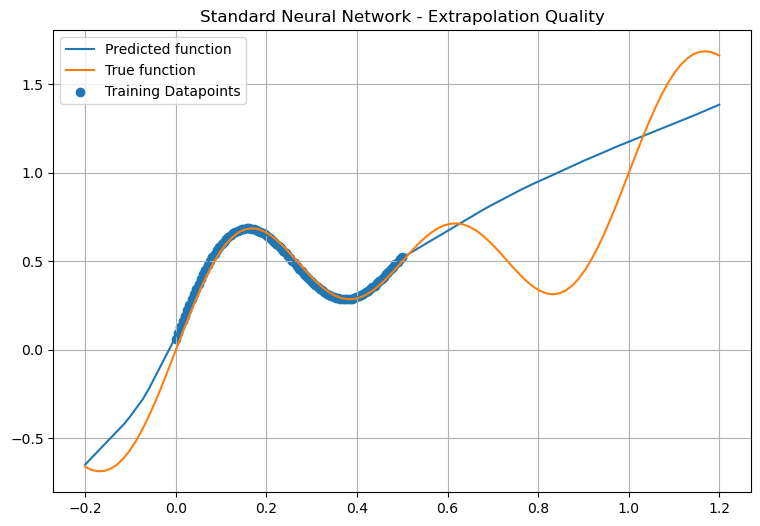

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(X_test_large.detach().numpy(), y_pred_large.detach().numpy(), label = "Predicted function")
plt.plot(X_test_large.detach().numpy(), y_true_large.detach().numpy(), label = "True function")
plt.scatter(X, y, label = "Training Datapoints")
plt.title("Standard Neural Network - Extrapolation Quality")
plt.legend()
plt.grid()
plt.show()

The neural network is overcofindent with regard to predictions outside the data-domain provided during training.